# Image Preprocessing

#### The first step in the pre-processing pipeline is to detect faces and eyes in an image. Once these features are detected, it will improve the accurace of the model. 

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# checking the dimension of a test image
# from the output, height = 390, width = 300, and colour = 3D

img = cv2.imread('C:/Users/USER/Image classification/images/cristiano ronaldo/CR7.jpg')
img.shape

(390, 300, 3)

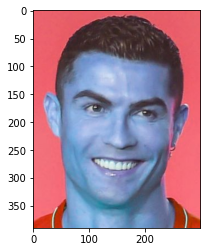

In [3]:
plt.imshow(img)

In [4]:
# converting the image from 3D to gray

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(390, 300)

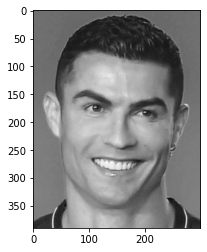

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
# Using HAARCascades to detect facial features in the image

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 45,  92, 220, 220]])

In [7]:
(x,y,w,h)=faces[0]
x,y,w,h

(45, 92, 220, 220)

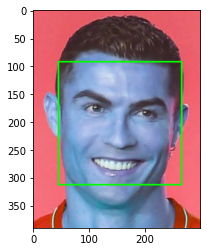

In [8]:
#drawing a rectangle on the face in the image

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

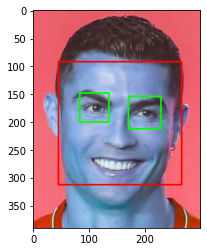

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_img = img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_img)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

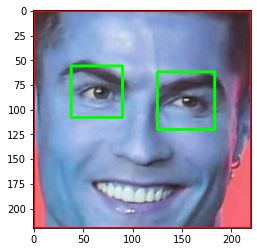

In [10]:
# cropping the face and the eye out of the image

%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
# creatiing a function that can crop face from images
# this function ensures all images used for the model can identify a well-defined face

def faces_and_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

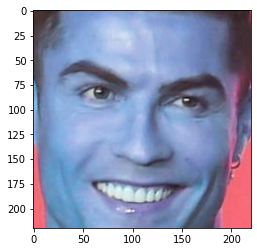

In [12]:
#testing the function

cropped_image = faces_and_eyes('C:/Users/USER/Image classification/images/cristiano ronaldo/CR7.jpg')
plt.imshow(cropped_image)

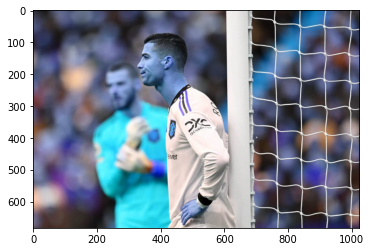

In [13]:
new_img = cv2.imread('C:/Users/USER/Image classification/images/cristiano ronaldo/GettyImages-1439505932.jpg')
plt.imshow(new_img)

In [14]:
#testing the function on new image

cropped_image2 = faces_and_eyes('C:/Users/USER/Image classification/images/cristiano ronaldo/GettyImages-1439505932.jpg')
cropped_image2

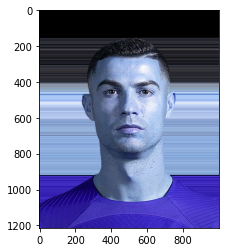

In [15]:
#testing on another image

new_img2 = cv2.imread('C:/Users/USER/Image classification/images/cristiano ronaldo/885.png')
plt.imshow(new_img2)

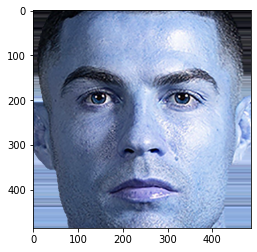

In [16]:
cropped_image3 = faces_and_eyes('C:/Users/USER/Image classification/images/cristiano ronaldo/885.png')
plt.imshow(cropped_image3)

In [17]:
#creating a directory to save the cropped images in a new folder
    
path_to_data = "C:/Users/USER/Image classification/images/"
path_to_cr_data = "C:/Users/USER/Image classification/images/cropped"

In [18]:
# verifying the dataset directory

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['C:/Users/USER/Image classification/images/cristiano ronaldo',
 'C:/Users/USER/Image classification/images/lionel messi',
 'C:/Users/USER/Image classification/images/neymar']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
# data cleaning to ensure only images with well defined facial features are saved

cropped_image_dirs = []
GOAT_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    GOAT_name = img_dir.split('/')[-1]
    print(GOAT_name)
    
    GOAT_file_names_dict[GOAT_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = faces_and_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + GOAT_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = GOAT_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            GOAT_file_names_dict[GOAT_name].append(cropped_file_path)
            count += 1   

cristiano ronaldo
Generating cropped images in folder:  C:/Users/USER/Image classification/images/croppedcristiano ronaldo
lionel messi
Generating cropped images in folder:  C:/Users/USER/Image classification/images/croppedlionel messi
neymar
Generating cropped images in folder:  C:/Users/USER/Image classification/images/croppedneymar


## Using wavelet transform as a feature for model training
#### A wavelet transformed image will bring out the edges and giveclues on various facial features such as eyes, nose, lips etc
##### Wavelet transform

In [22]:
# importing necessary library

import pywt
   
# Creating a wavelet transform function - function was retrieved from stackoverflow

def wavelet_transform(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

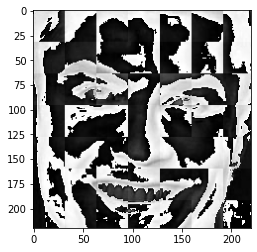

In [23]:
# testing the function

im_har = wavelet_transform(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [24]:
# Assigning number to footballers - this is equivalent to one-hot encoding
# this is because machine learning model can only understand numbers 

class_dict = {}
count = 0
for GOAT_name in GOAT_file_names_dict.keys():
    class_dict[GOAT_name] = count
    count = count + 1
class_dict

{'cristiano ronaldo': 0, 'lionel messi': 1, 'neymar': 2}

### Using the raw images in the cropped folder along with wavelet transformed images to train the image classifier.

In [25]:
X, y = [], []
for GOAT_name, training_files in GOAT_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = wavelet_transform(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[GOAT_name])  

In [26]:
len(X[0])

4096

In [27]:
X[0]

array([[60],
       [55],
       [56],
       ...,
       [ 1],
       [ 7],
       [ 1]], dtype=uint8)

In [28]:
y[0]

0

In [29]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(144, 4096)

### Modelling

In [30]:
# importing models needed for model training
# using support vector machine (SVM) for the model training because it is a classification model

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)*100

86.11111111111111

In [32]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.78      0.88      0.82         8
           2       0.85      0.85      0.85        13

    accuracy                           0.86        36
   macro avg       0.85      0.86      0.86        36
weighted avg       0.87      0.86      0.86        36



### Grid Search CV to fine tune the model

In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [35]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.710823,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.509957,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.748485,{'logisticregression__C': 5}


In [36]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

### Testing the model

In [37]:
best_estimators['svm'].score(X_test,y_test)*100

86.11111111111111

In [38]:
best_estimators['random_forest'].score(X_test,y_test)*100

44.44444444444444

In [39]:
best_estimators['logistic_regression'].score(X_test,y_test)*100

77.77777777777779

In [40]:
# I will use svm performed best

best_clf = best_estimators['svm']

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[13,  1,  1],
       [ 0,  7,  1],
       [ 1,  1, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

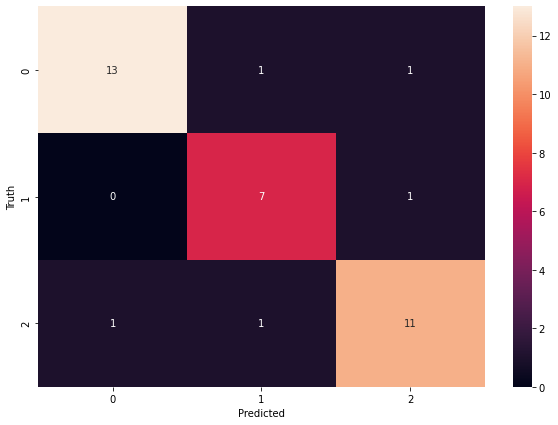

In [42]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
class_dict

{'cristiano ronaldo': 0, 'lionel messi': 1, 'neymar': 2}

### Save Trained Model

In [44]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

### Save class dictionary

In [45]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))